[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_descriptive_analytics.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is on cluster analysis.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Tutorial 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linspace()` for this purpose. 

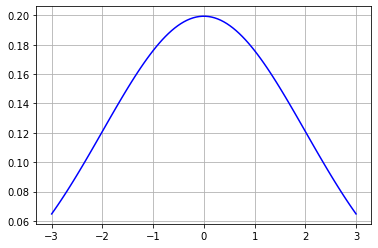

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mean = 0
std = 2

x_min = -3
x_max = 3


x = np.linspace(x_min,x_max,100)

a = math.sqrt(2*std**2*math.pi)
b = -((x-mean)**2)/(2*std**2)
c = np.exp(b)
y = (1/a)*c

plt.plot(x,y, color='blue')
plt.grid()





Then, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *stats models library*, which we import below. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable **nvValues**.

In [11]:
nvValues = stats.norm.pdf(x,mean,std)

We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

Text(0, 0.5, 'nvValues')

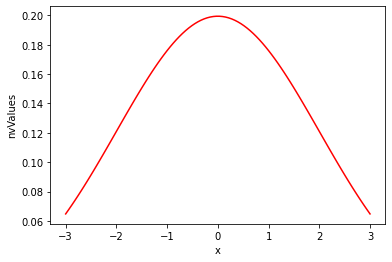

In [12]:
plt.plot(x,nvValues, color = 'red')
plt.xlabel('x')
plt.ylabel('nvValues')

## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

In [48]:
# Generate data for clustering
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

np.random.seed(888)
n = 500
n_cluster = 4
std = 2

X,y = make_blobs(n_samples=n, centers=n_cluster, cluster_std=std)


In [14]:
X.shape, y.shape

((500, 2), (500,))

In [16]:
y[:5]

array([0, 0, 1, 3, 0])

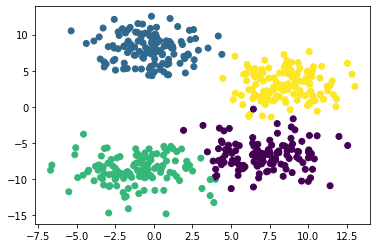

In [49]:

plt.scatter(X[:,0],X[:,1], c=y)

## 2.2 kMeans
The second tutorial provided a *from scratch implementation* of the kMeans algorithm. Go back to the tutorial and copy/paste the relevant parts of the code into this notebook. This will allow you to run the algorithm here.

In [51]:
# From-scratch implementation of kMeans 
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [52]:
def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

In [53]:
def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

In [55]:
def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [euclidean_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

In [56]:
def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

In [57]:
def is_converged(centroids_old, centroids):
    """Check if centroids have changed since last iteration"""
    return (centroids == centroids_old).all()

In [58]:
def KMeans_from_scratch_euclidean(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids): # check if last iteration's centroids were the same as current iteration
            break # exit loop since there was no change since last iteration
    
    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    labels = label_cluster(n_samples, clusters)  # classify samples as the index of their clusters
    dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])]  # get distance from each point to its centroid
    total_dist = np.sum(np.square(dist))  # total distance calculated as sum of squares     
        
    return labels, iteration_num, K, centroids, total_dist

Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

In [59]:
# Clustering of the artificial data
result_euclidean = KMeans_from_scratch_euclidean(X, K=4, max_iters=100)

## 2.3 Distance function
In the lecture, we argued that clustering methods and kMeans are versatile in that the support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. You can look up the formula of the cosine similarity in the lecture slides of chapter 2, or from the Internet. 

In [60]:
from numpy import dot
from numpy.linalg import norm

def cosine_sim(a,b):
  return dot(a*b)/(norm(a)*norm(b))


Next thing to do is to change the above from scratch implementation of the kMeans algorithm such that it uses your cosine similarity function for clustering the data. It might be better to copy/past the full kMeans code one more time because this will allow you to have both versions, with Euclidean distance and cosine similarity, in the notebook. This makes it easier to re-run the clustering in case you need or want to.

In [61]:
# kMeans with cosine similarity

from numpy import dot
from numpy.linalg import norm

def cosine_sim(a,b):
  return dot(a,b)/(norm(a)*norm(b))

def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [cosine_sim(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index


def KMeans_from_scratch_cosine(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids): # check if last iteration's centroids were the same as current iteration
            break # exit loop since there was no change since last iteration
    
    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    labels = label_cluster(n_samples, clusters)  # classify samples as the index of their clusters
    dist = [cosine_sim(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])]  # get distance from each point to its centroid
    total_dist = np.sum(np.square(dist))  # total distance calculated as sum of squares     
        
    return labels, iteration_num, K, centroids, total_dist


In [62]:
result = KMeans_from_scratch_cosine(X, K=4, max_iters=100)

In [46]:
print("No. Iterations:", result[1], ", No. Centres:", result[2], ", Total Squared Distance {:.4}".format(result[4]))

No. Iterations: 100 , No. Centres: 4 , Total Squared Distance 445.8


## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [63]:
# Create cluster solution with the modified kMeans
result_cosine = KMeans_from_scratch(X, K=4, max_iters=100)
result_euclidean = KMeans_from_scratch_euclidean(X, K=4, max_iters=100)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
# Write some code to compare the two cluster solutions from using Euclidean distance and cosine similarity 


## 2.5 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

# Done... puh, that was a lot of work. And you did it! Congratulations!!! 